In [2]:
# project 1 initial review
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
accts = pd.read_csv("../Project1/ZayoHackathonData_Accounts.csv")
cpqs = pd.read_csv("../Project1/ZayoHackathonData_CPQs.csv")
opp = pd.read_csv("../Project1/ZayoHackathonData_Opportunities.csv")
svcs = pd.read_csv("../Project1/ZayoHackathonData_Services.csv")
sts = pd.read_csv("../Project1/ZayoHackathonData_Sites.csv")

In [4]:
accts.head()

,﻿Account ID,Industry,Vertical,Total BRR,AnnualRevenue,NumberOfEmployees,DandB Revenue,DandB Total Employees
0,Acct-000273,Telecommunications,Wireless,"$6,084,906.00","$248,747,365.62",397,"$356,943,618.45",397
1,Acct-000013,Telecommunications,National Carrier/ISP,"$5,117,529.00","$10,779,768,901.96",40000,"$10,779,768,901.96",40000
2,Acct-000036,Telecommunications,Wireless,"$5,105,015.00","$9,277,969,886.09",34518,"$19,094,310,655.17",34518
3,Acct-000025,Telecommunications,National Carrier/ISP,"$4,234,871.00","$6,248,394,000.00",10040,"$7,587,138,000.00",12500
4,Acct-000004,Telecommunications,Wireless,"$3,510,947.00","$29,669,960,000.00",30000,"$32,588,090,000.00",30000


In [5]:
cpqs.head()

,﻿CPQ ID,Account ID,CreatedDate,Product Group,X36 MRC List,X36 NRR List,X36 NPV List,Building ID,Market,Street Address,City,State,Postal Code,Network Proximity,On Zayo Network Status
0,CPQ-000001,Acct-000001,10/4/16,Ethernet,"$1,621.68",$922.00,"$11,894.29",Bldg-108671,Denver,9706 E Easter Ave,Englewood,CO,80112,109.60,On Zayo Network
1,CPQ-000002,Acct-000002,10/4/16,Wavelengths - Metro,"$1,445.92","$2,766.00","$19,926.89",Bldg-015169,Denver,1425 Champa St,Denver,CO,80202,148.72,On Zayo Network
2,CPQ-000002,Acct-000002,10/4/16,Wavelengths - Metro,"$1,445.92","$2,766.00","$19,926.89",Bldg-111386,Denver,3431 N Windsor Dr,Aurora,CO,80011,779.17,On Zayo Network
3,CPQ-000003,Acct-000003,10/4/16,Ethernet,"$1,420.38",$922.00,"$28,437.18",Bldg-014866,Dallas,1950 N Stemmons Fwy,Dallas,TX,75207,239.80,On Zayo Network
4,CPQ-000004,Acct-000004,10/4/16,Ethernet,"$1,553.61","$1,613.50","$28,654.35",Bldg-038523,Atlanta,375 Riverside Pkwy,Lithia Springs,GA,30122,274.12,On Zayo Network


In [6]:
opp.head()

,﻿Opportunity ID,Account ID,StageName,IsClosed,IsWon,CreatedDate,Term in Months,Service,Opportunity Type,Product Group,Building ID,Market,Street Address,City,State,Postal Code,Network Proximity,On Zayo Network Status
0,Opp-000001,Acct-000007,Closed - Lost,True,False,7/1/16,12.0,NaN,New Service,Ethernet,Bldg-012582,Atlanta,56 Marietta St NW,Atlanta,GA,30303,66.45,On Zayo Network
1,Opp-000002,Acct-000986,5 - Accepted,True,True,7/1/16,60.0,NaN,New Service,Dark Fiber - Metro,Bldg-016855,Atlanta,300 Satellite Blvd NW,Suwanee,GA,30024,374.79,On Zayo Network
2,Opp-000002,Acct-000986,5 - Accepted,True,True,7/1/16,60.0,NaN,New Service,Dark Fiber - Metro,Bldg-109003,Atlanta,305 Satellite Blvd NW,Suwanee,GA,30024,250.74,On Zayo Network
3,Opp-000003,Acct-000011,5 - Accepted,True,True,7/1/16,36.0,NaN,New Service,Dark Fiber - Metro,Bldg-012582,Atlanta,56 Marietta St NW,Atlanta,GA,30303,66.45,On Zayo Network
4,Opp-000003,Acct-000011,5 - Accepted,True,True,7/1/16,36.0,NaN,New Service,Dark Fiber - Metro,Bldg-038069,Atlanta,1100 Abernathy Rd NE,Atlanta,GA,30328,151.21,On Zayo Network


In [7]:
svcs.head()

,﻿Service ID,Account ID,Total MRR,Netx MRC,Product Group,Status
0,Svc-000001,Acct-001547,"$9,638.84",$-,Dark Fiber - Metro,Active
1,Svc-000002,Acct-001547,"$2,357.42",$-,Dark Fiber - Metro,Active
2,Svc-000003,Acct-000009,"$1,152.78",$-,zColo,Active
3,Svc-000004,Acct-000009,$-,$-,zColo,Active
4,Svc-000005,Acct-001425,$93.70,$-,zColo,Active


In [8]:
sts.head()

,﻿Site ID,Account ID,Building ID,Market,Site Address,City,State,Postal Code,Network Proximity,On Zayo Network Status
0,Site-000001,Acct-000025,Bldg-115472,Atlanta,953 Donnelly Ave SW,Atlanta,GA,30310,116.91,Not on Zayo Network
1,Site-000002,Acct-001331,Bldg-115472,Atlanta,953 Donnelly Ave SW,Atlanta,GA,30310,116.91,Not on Zayo Network
2,Site-000003,Acct-001359,Bldg-115475,Atlanta,3159 Royal Dr,Alpharetta,GA,30005,979.44,On Zayo Network
3,Site-000004,Acct-001360,Bldg-115475,Atlanta,3159 Royal Dr,Alpharetta,GA,30022,979.44,On Zayo Network
4,Site-000005,Acct-000009,Bldg-115476,Atlanta,1593 Northeast Expy NE,Atlanta,GA,30329,177.41,Not on Zayo Network


In [3]:
lost_ops=opp[opp['StageName']=="Closed - Lost"]
won_ops=pd.concat([opp[opp['StageName']=="3 - Committed"],opp[opp['StageName']=="4 - Closed"],opp[opp['StageName']=="5 - Accepted"]])

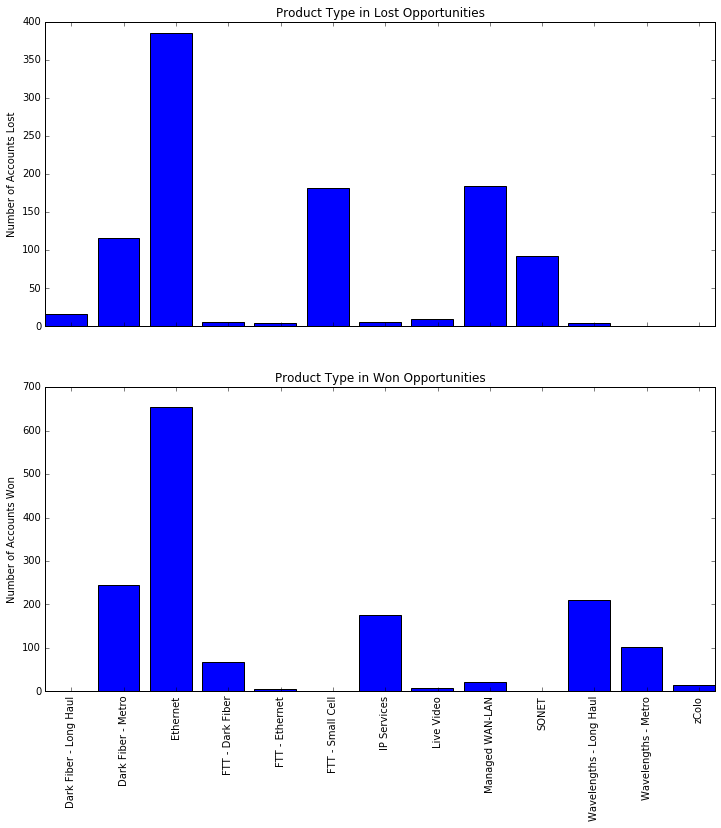

In [5]:
pg={}
prod=np.unique(lost_ops["Product Group"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(lost_ops["Product Group"])):
        if lost_ops["Product Group"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
f,ax=plt.subplots(2,sharex=True)
f.set_figwidth(12)
f.set_figheight(12)
ax[0].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.xticks(v,prod,rotation="vertical")
ax[0].set_title("Product Type in Lost Opportunities")
ax[0].set_ylabel("Number of Accounts Lost")
pg={}
prod=np.unique(won_ops["Product Group"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(won_ops["Product Group"])):
        if won_ops["Product Group"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
ax[1].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.xticks(v,prod,rotation="vertical")
ax[1].set_title("Product Type in Won Opportunities")
ax[1].set_ylabel("Number of Accounts Won")

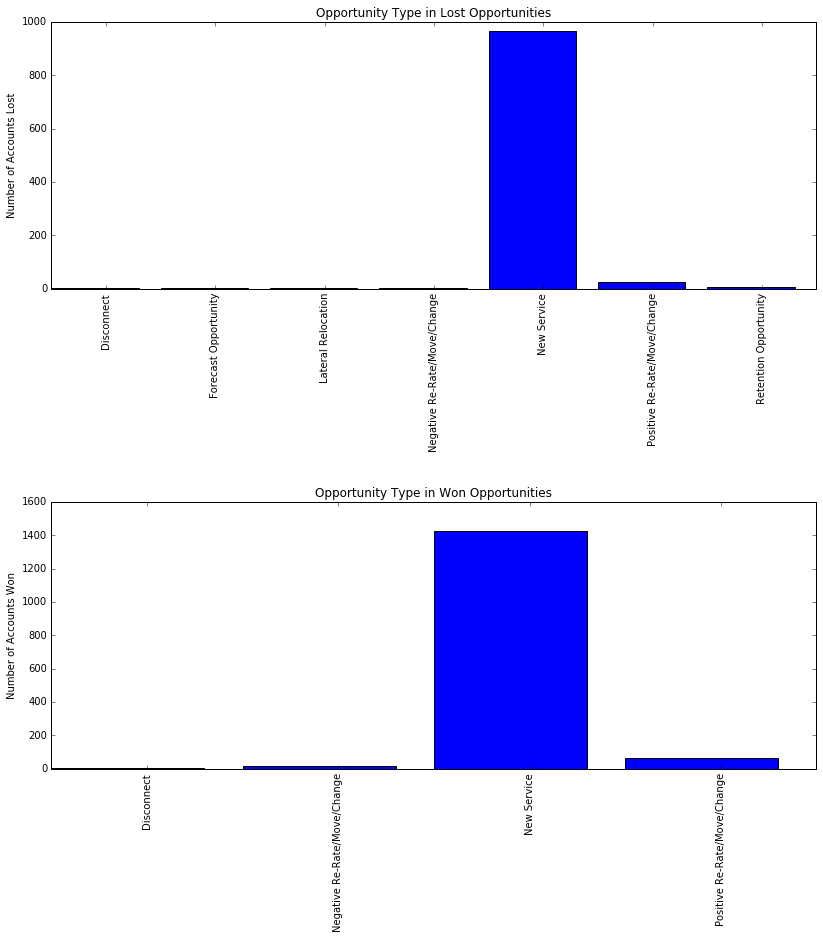

In [21]:
pg={}
prod=np.unique(lost_ops["Opportunity Type"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(lost_ops["Opportunity Type"])):
        if lost_ops["Opportunity Type"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count

f,ax=plt.subplots(2,sharex=False)

f.tight_layout()
f.set_figwidth(12)
f.set_figheight(12)
ax[0].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.sca(ax[0])
plt.subplots_adjust( hspace=.8)
plt.xticks(v,prod,rotation="vertical")
ax[0].set_title("Opportunity Type in Lost Opportunities")
ax[0].set_ylabel("Number of Accounts Lost")
pg={}
prod=np.unique(won_ops["Opportunity Type"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(won_ops["Opportunity Type"])):
        if won_ops["Opportunity Type"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
ax[1].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.sca(ax[1])

plt.xticks(v,prod,rotation="vertical")
ax[1].set_title("Opportunity Type in Won Opportunities")
ax[1].set_ylabel("Number of Accounts Won")

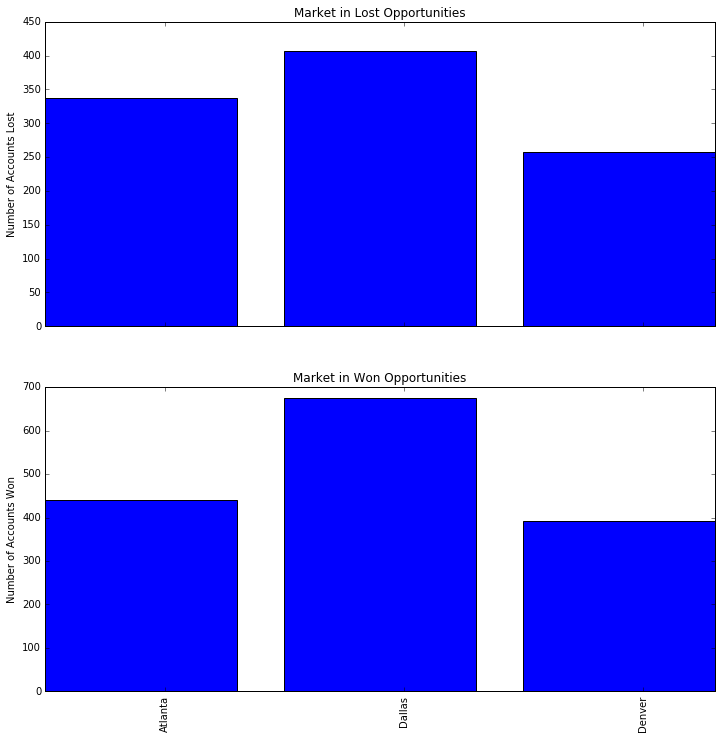

In [22]:
pg={}
prod=np.unique(lost_ops["Market"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(lost_ops["Market"])):
        if lost_ops["Market"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
f,ax=plt.subplots(2,sharex=True)
f.set_figwidth(12)
f.set_figheight(12)
ax[0].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.xticks(v,prod,rotation="vertical")
ax[0].set_title("Market in Lost Opportunities")
ax[0].set_ylabel("Number of Accounts Lost")
pg={}
prod=np.unique(won_ops["Market"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(won_ops["Market"])):
        if won_ops["Market"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
ax[1].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.xticks(v,prod,rotation="vertical")
ax[1].set_title("Market in Won Opportunities")
ax[1].set_ylabel("Number of Accounts Won")

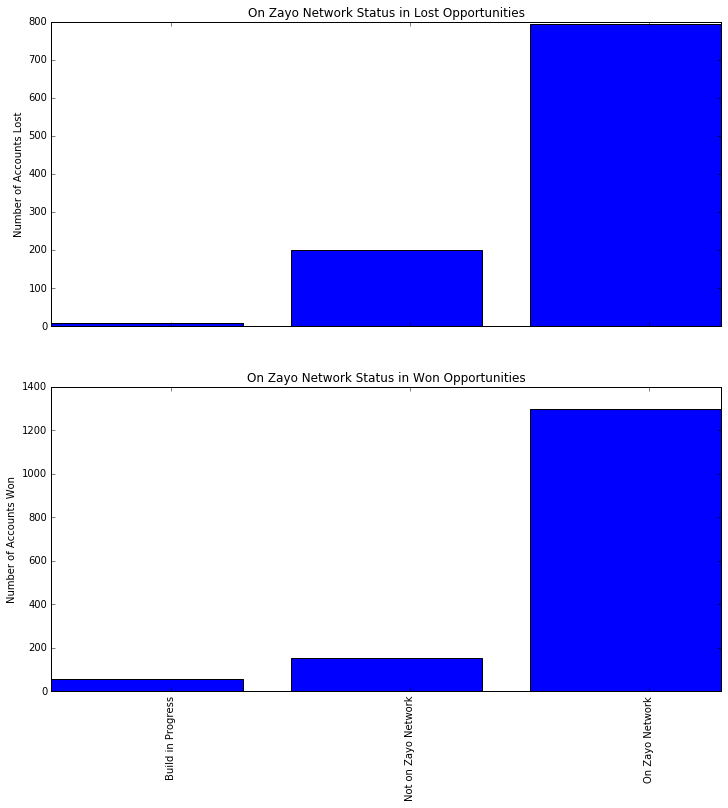

In [23]:
pg={}
prod=np.unique(lost_ops["On Zayo Network Status"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(lost_ops["On Zayo Network Status"])):
        if lost_ops["On Zayo Network Status"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
f,ax=plt.subplots(2,sharex=True)
f.set_figwidth(12)
f.set_figheight(12)
ax[0].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.xticks(v,prod,rotation="vertical")
ax[0].set_title("On Zayo Network Status in Lost Opportunities")
ax[0].set_ylabel("Number of Accounts Lost")
pg={}
prod=np.unique(won_ops["On Zayo Network Status"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(won_ops["On Zayo Network Status"])):
        if won_ops["On Zayo Network Status"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
ax[1].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.xticks(v,prod,rotation="vertical")
ax[1].set_title("On Zayo Network Status in Won Opportunities")
ax[1].set_ylabel("Number of Accounts Won")


# SHOW PERCENT CHANCE OF WINNING BASED ON SELECTED CATEGORY!!!!

In [24]:
lost_acts=accts[accts[accts.columns[0]].isin(lost_ops["Account ID"])]
won_acts=accts[accts[accts.columns[0]].isin(won_ops["Account ID"])]

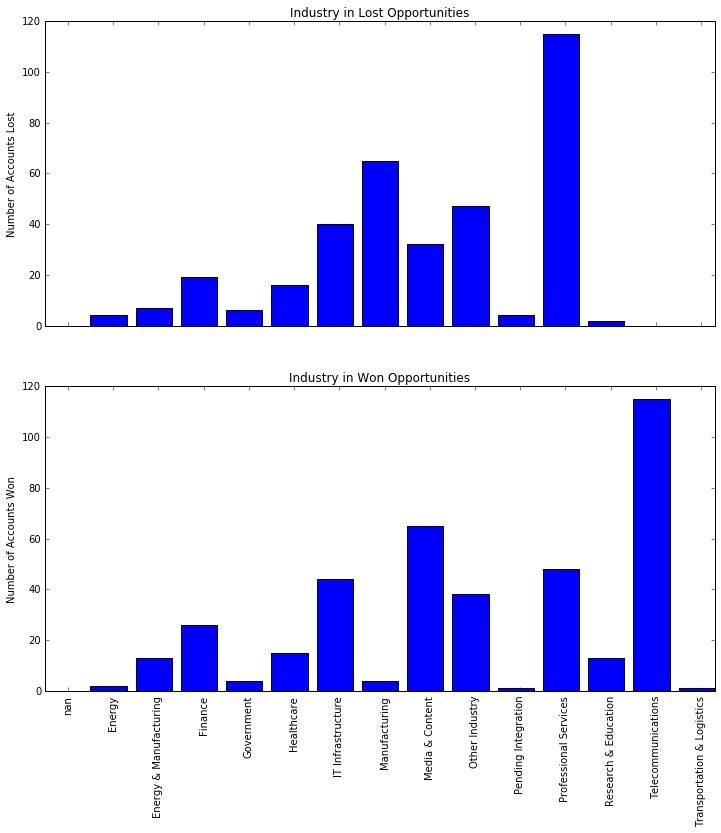

In [29]:
pg={}
prod=np.unique(lost_acts["Industry"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(lost_acts["Industry"])):
        if lost_acts["Industry"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
f,ax=plt.subplots(2,sharex=True)
f.set_figwidth(12)
f.set_figheight(12)
ax[0].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.xticks(v,prod,rotation="vertical")
ax[0].set_title("Industry in Lost Opportunities")
ax[0].set_ylabel("Number of Accounts Lost")
pg={}
prod=np.unique(won_acts["Industry"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(won_acts["Industry"])):
        if won_acts["Industry"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
ax[1].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.xticks(v,prod,rotation="vertical")
ax[1].set_title("Industry in Won Opportunities")
ax[1].set_ylabel("Number of Accounts Won")

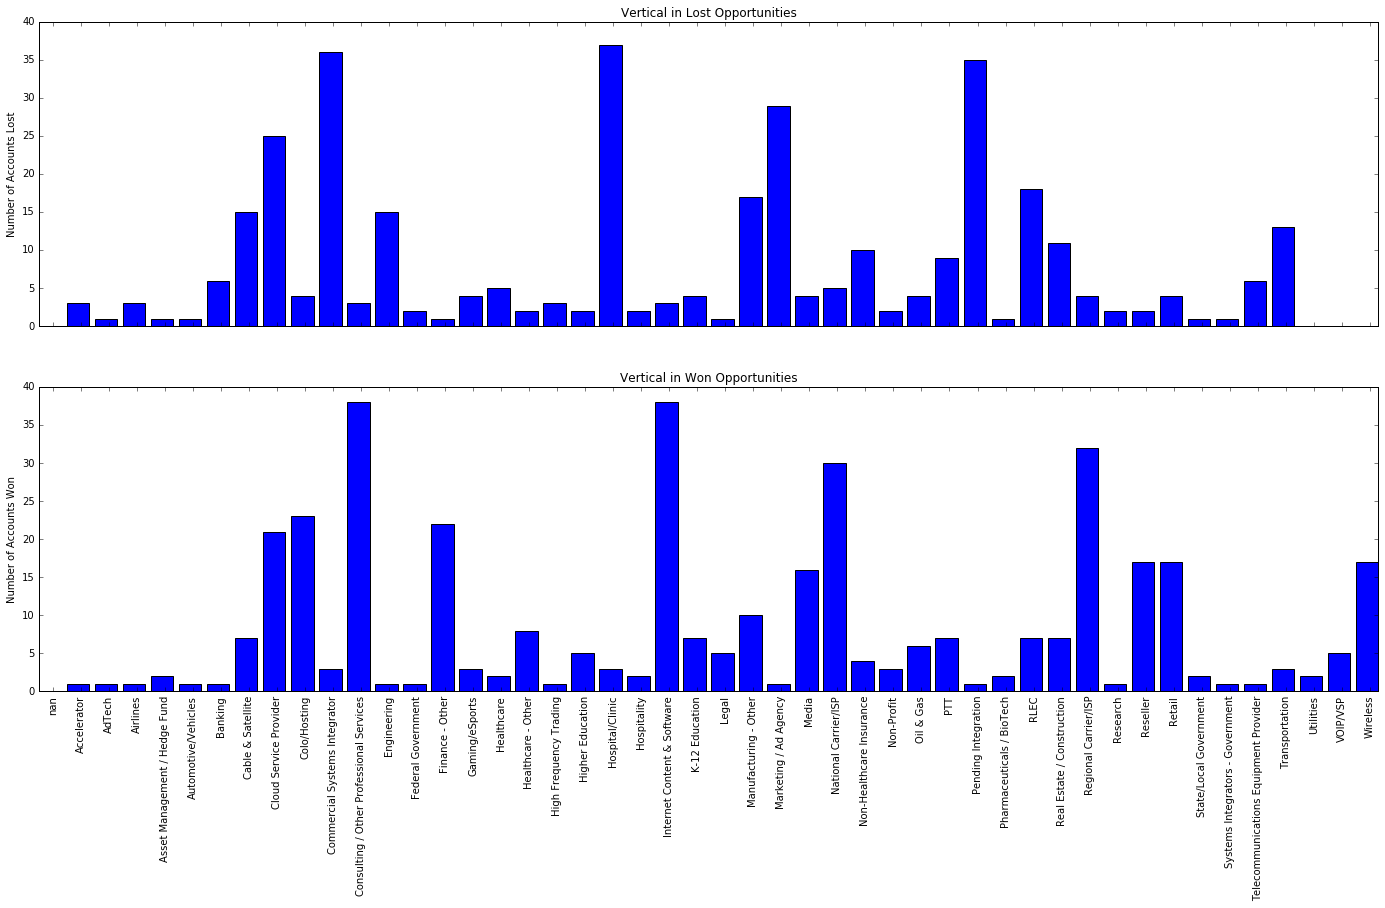

In [39]:
pg={}
prod=np.unique(lost_acts["Vertical"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(lost_acts["Vertical"])):
        if lost_acts["Vertical"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
f,ax=plt.subplots(2,1,sharex=True)
f.set_figwidth(24)
f.set_figheight(12)
ax[0].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.sca(ax[0])
plt.xticks(v,prod,rotation="vertical")
ax[0].set_title("Vertical in Lost Opportunities")
ax[0].set_ylabel("Number of Accounts Lost")
pg={}
prod=np.unique(won_acts["Vertical"])
for i in range(0,len(prod)):
    count =0
    for j in range(0,len(won_acts["Vertical"])):
        if won_acts["Vertical"].iloc[j]==prod[i]:
            count+=1
    pg[i]=count
ax[1].bar(pg.keys(),pg.values())
v=np.arange(0,len(prod))
v=[i+.5 for i in v]
plt.sca(ax[1])
plt.xticks(v,prod,rotation="vertical")
ax[1].set_title("Vertical in Won Opportunities")
ax[1].set_ylabel("Number of Accounts Won")